<a href="https://colab.research.google.com/github/Sushi011/hello_world/blob/randomForest/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Besa_Esteban_Paculan_III-ACSAD**

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [28]:
from dataclasses import dataclass
#read the candidate csv file
data = pd.read_csv("Auto.csv")
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [30]:
# Convert all strings to numerical(categorical)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded = pd.get_dummies(data[categorical_cols])

In [31]:
auto_df = data.drop(columns=categorical_cols)
auto_df = pd.concat([auto_df, one_hot_encoded], axis=1)

# Display modified DataFrame with one-hot encoded columns
print(auto_df.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_twelve  \
0         130       3.47    2.68  ...                      0   
1         130       3.47    2.68  ...                      0   
2         152       2.68    3.47  ...                      0   
3         109       3.19    3.40  ...                      0   
4         136       3.19    3.40  ...                      0   

   cylindernumber_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                0                0         

In [33]:

# Assuming 'data' is your DataFrame
features = data[['citympg', 'horsepower', 'enginesize', 'highwaympg', 'enginesize', 'curbweight', 'carwidth', 'carlength']]
target = data['highwaympg']

# Assuming 'data' is your DataFrame
#features = data[['wheelbase', 'carwidth', 'curbweight', 'highwaympg', 'enginesize', 'boreratio', 'citympg', 'price']]
#target = data['carlengthhig']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Fitting the model with training data
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluation
score_rf = rf_model.score(X_test, y_test)
mse_rf = mean_squared_error(y_test, y_pred)

print("Random Forest - Coefficient of determination (R²): {:.2f}%".format(score_rf * 100))
print("Random Forest - Mean Squared Error (MSE): {:.2f}".format(mse_rf))

Random Forest - Coefficient of determination (R²): 97.11%
Random Forest - Mean Squared Error (MSE): 2.04


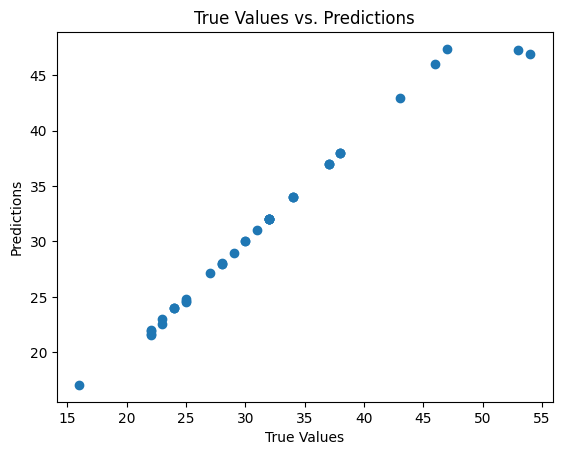

In [34]:
# Plotting actual vs. predicted values (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()